In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt


# Importing the needed libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [3]:
columns = [ 'Movie Name' , 'Genre' , 'Description']

In [4]:
# delimiter ::: is used
df_train = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt' , delimiter=':::' , engine='python' , names=columns , index_col=0 )

# looking at the data
df_train.head(3)

,Movie Name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...


In [5]:
# delimiter ::: is used
df_test = pd.read_csv('/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt', delimiter=':::' , engine='python' , names=columns , index_col=0 )

# looking at the data
df_test.head(3)

,Movie Name,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...


# DATA PREPROCESSING

In [6]:
# converting the data in lowercase
df_train.loc[:,'Description'] = df_train['Description'].astype(str).str.lower()
df_test.loc[:,'Description'] = df_test['Description'].astype(str).str.lower()

In [7]:
# drop the Movie Name column
df_train.drop(columns=['Movie Name'], inplace = True)
df_test.drop(columns=['Movie Name'], inplace = True)

In [8]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        54214 non-null  object
 1   Description  54214 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [9]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genre        54200 non-null  object
 1   Description  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [10]:
print(df_train.shape)

(54214, 2)


In [11]:
print(df_test.shape)

(54200, 2)


# DATA CLEANING

In [12]:
# Checking the null Values
df_train.isnull().sum()
df_test.isnull().sum()

Genre          0
Description    0
dtype: int64

In [13]:
# check the repeated values from train
print("Repeated train values:", df_train.duplicated().sum())

Repeated train values: 110


In [14]:
# check the repeated values from test
print("Repeated test values:", df_test.duplicated().sum())

Repeated test values: 114


In [15]:
# omit the repeating values
df_train = df_train.drop_duplicates(keep ='first')
df_test = df_test.drop_duplicates(keep = 'first')

In [16]:
# divide the data
x_train_full = df_train['Description']
y_train_full = df_train['Genre']

x_test = df_test['Description']
y_test = df_test['Genre']

In [17]:
x_train_full[1]

' listening in to a conversation between his doctor and parents, 10-year-old oscar learns what nobody has the courage to tell him. he only has a few weeks to live. furious, he refuses to speak to anyone except straight-talking rose, the lady in pink he meets on the hospital stairs. as christmas approaches, rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow oscar to live life and love to the full, in the company of his friends pop corn, einstein, bacon and childhood sweetheart peggy blue.'

In [18]:
#checking the shapes
print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)

(54104,)
(54104,)
(54086,)
(54086,)


# DATA VISUALIZATION

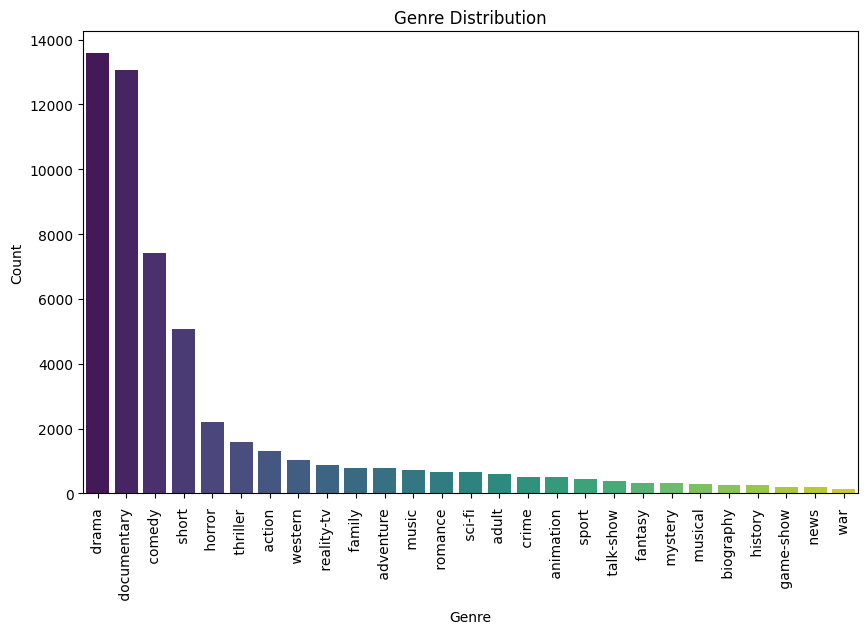

In [19]:
# genre distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Genre' , data=df_train , order=df_train['Genre'].value_counts().index ,palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

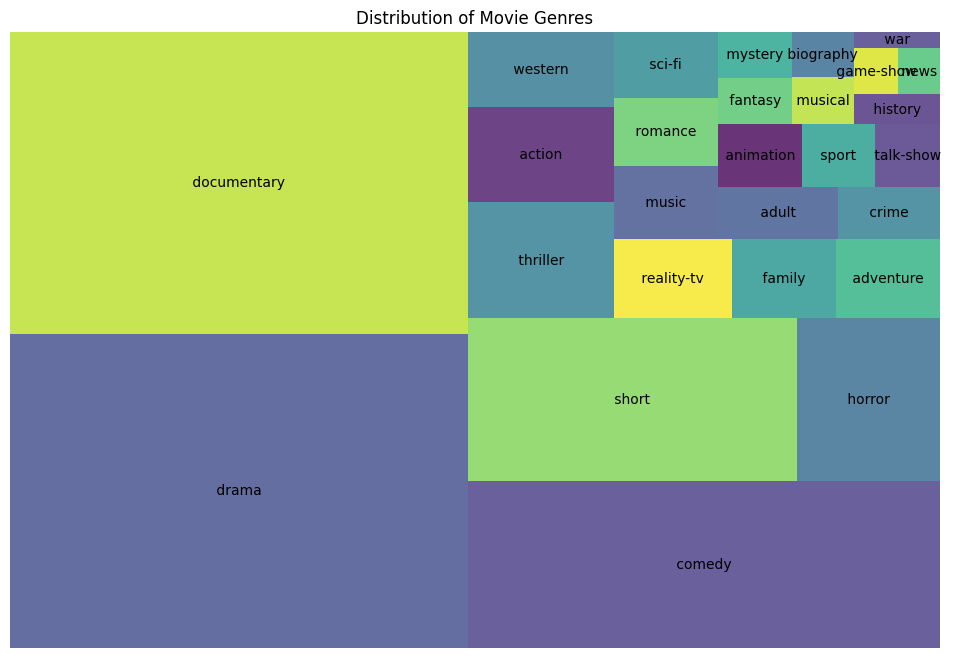

In [20]:
import squarify

plt.figure(figsize=(12, 8))
sizes = df_train['Genre'].value_counts()
labels = sizes.index
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.title('Distribution of Movie Genres')
plt.axis('off')
plt.show()

# DATA SPLITTING

In [21]:
X_train , X_val , Y_train , Y_val = train_test_split(x_train_full , y_train_full , test_size=0.2 , random_state=42)

# Vectorization of Text data

In [22]:
# Vectorization of the string data
tfidf = TfidfVectorizer(stop_words ='english' , max_features=5000)

X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(x_test)

In [23]:
print(X_train_vec[0]) # This is the vectorized Data

  (0, 3349)	0.13496296391902018
  (0, 3962)	0.1998579416552861
  (0, 131)	0.21047166272635726
  (0, 3649)	0.15585814712267462
  (0, 3330)	0.1953976834675829
  (0, 2273)	0.20727319342379333
  (0, 3078)	0.1966658238385755
  (0, 573)	0.20750031186569842
  (0, 1614)	0.15307163859680775
  (0, 3772)	0.2296725068352876
  (0, 1753)	0.19298704832991515
  (0, 2274)	0.19209689211977382
  (0, 4194)	0.2534096234869123
  (0, 1284)	0.2107206820532034
  (0, 4142)	0.254708999632335
  (0, 3485)	0.17465634467034724
  (0, 2791)	0.2153937832544831
  (0, 1832)	0.14243784039426607
  (0, 4038)	0.13604641212941426
  (0, 3242)	0.234266320857675
  (0, 4027)	0.13184901622589132
  (0, 3964)	0.22840463774807102
  (0, 3644)	0.25174918788887946
  (0, 1334)	0.15343216463843712
  (0, 335)	0.15951402119620314
  (0, 2968)	0.1845526987062409


# TESTING DIFFERENT MODELS AND THEIR ACCURACY

In [24]:
# Classifiers being used
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB()
}

# Trying all of 'em
for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train_vec, Y_train)
    y_pred_test = clf.predict(X_test_vec)
    print(f"Results for {name}:")
    print(classification_report(y_test, y_pred_test))
    print("-" * 60)


Training Logistic Regression...
Results for Logistic Regression:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.48      0.26      0.34      1314
       adult        0.58      0.21      0.31       590
   adventure        0.56      0.15      0.23       773
   animation        0.50      0.05      0.10       498
   biography        0.00      0.00      0.00       264
      comedy        0.52      0.57      0.54      7437
       crime        0.38      0.04      0.07       505
 documentary        0.66      0.85      0.75     13085
       drama        0.54      0.77      0.63     13565
      family        0.53      0.08      0.14       774
     fantasy        0.58      0.04      0.08       322
   game-show        0.91      0.49      0.64       193
     history        0.00      0.00      0.00       243
      horror        0.64      0.55      0.60      2204
       music        0.68      0.42      0.52       720
     musical        0.40      0.02      0.04       273
     mystery        0.67      0.01      0.01       318
        n

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.51      0.20      0.29      1314
       adult        0.60      0.20      0.30       590
   adventure        0.69      0.14      0.24       773
   animation        0.62      0.05      0.10       498
   biography        0.00      0.00      0.00       264
      comedy        0.51      0.55      0.53      7437
       crime        0.50      0.01      0.02       505
 documentary        0.65      0.87      0.74     13085
       drama        0.51      0.81      0.63     13565
      family        0.60      0.05      0.09       774
     fantasy        0.75      0.02      0.04       322
   game-show        0.89      0.50      0.64       193
     history        0.00      0.00      0.00       243
      horror        0.66      0.54      0.59      2204
       music        0.75      0.35      0.47       720
     musical        0.20      0.00      0.01       273
     mystery        0.00      0.00      0.00       318
        n

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.36      0.01      0.02      1314
       adult        0.52      0.12      0.19       590
   adventure        0.76      0.08      0.15       773
   animation        0.20      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.50      0.30      0.38      7437
       crime        1.00      0.00      0.00       505
 documentary        0.57      0.85      0.68     13085
       drama        0.42      0.82      0.56     13565
      family        1.00      0.01      0.02       774
     fantasy        0.00      0.00      0.00       322
   game-show        0.73      0.54      0.62       193
     history        0.00      0.00      0.00       243
      horror        0.59      0.20      0.30      2204
       music        0.68      0.21      0.32       720
     musical        0.23      0.01      0.02       273
     mystery        0.00      0.00      0.00       318
        n

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.18      0.02      0.04      1314
       adult        0.56      0.07      0.13       590
   adventure        0.63      0.06      0.11       773
   animation        0.22      0.01      0.02       498
   biography        0.00      0.00      0.00       264
      comedy        0.38      0.08      0.13      7437
       crime        0.36      0.01      0.02       505
 documentary        0.61      0.28      0.38     13085
       drama        0.36      0.52      0.43     13565
      family        0.45      0.03      0.06       774
     fantasy        0.12      0.00      0.01       322
   game-show        0.82      0.47      0.59       193
     history        0.00      0.00      0.00       243
      horror        0.52      0.06      0.10      2204
       music        0.57      0.18      0.27       720
     musical        0.04      0.00      0.01       273
     mystery        0.25      0.00      0.01       318
        n

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.59      0.09      0.15      1314
       adult        0.54      0.06      0.10       590
   adventure        0.81      0.05      0.10       773
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       264
      comedy        0.51      0.42      0.46      7437
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.87      0.69     13085
       drama        0.45      0.83      0.59     13565
      family        0.00      0.00      0.00       774
     fantasy        0.00      0.00      0.00       322
   game-show        0.98      0.27      0.43       193
     history        0.00      0.00      0.00       243
      horror        0.70      0.33      0.45      2204
       music        0.80      0.09      0.16       720
     musical        0.00      0.00      0.00       273
     mystery        0.00      0.00      0.00       318
        n

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# thanks